#'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Canceled, Refused or Unused offer.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from scipy.stats import kurtosis
import scipy



In [ ]:
#for importing datasets uploaded on the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#to view the folder import from the google drive 
!ls "/content/drive/MyDrive/AAS module end exam/"

'AAS Module Test.docx'	     'EDA STEPS.docx'
 application_data.csv	     'EDA ZOMATO.ipynb'
 columns_description.csv      previous_application.csv
 columns_description.gsheet  'Problem Statement.docx'
 Covid_Analysis.ipynb	     'Summary Report_Vineeta_Aman.pdf'


In [ ]:
#assigning path variable to path of the data sets
path2=  "/content/drive/MyDrive/AAS module end exam/previous_application.csv"

# Importing Data from CSV

In [ ]:
# importing "previous_application" data set from csv the drive
pa_df=pd.read_csv(path2)


In [ ]:
# importing "columns_description" data set from csv 
col_df=pd.read_csv("columns_description.csv", encoding='latin1')

# Viewing the Dataset

In [ ]:
#checking first five rows and columns of the previous_application dataset
pa_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking first five rows and columns of the columns_description dataset
col_df.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [ ]:
#checking the shape of the dataset "previous_application"
pa_df.shape

(1670214, 37)

In [ ]:
#checking the shape of the dataset "columns_description"
col_df.shape

(160, 5)

In [ ]:
#checking the dimension of the "previous_application" data set -- We have a two dimension dataset
pa_df.ndim

2

In [ ]:
 #checking last five rows and columns of the raw dataset--"previous_data"
pa_df.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [ ]:
#checking the data types of columns of data set "previous_application"
pa_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [ ]:
pa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
pa_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
# checking all the columns including those that are of type object
pa_df.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,...,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,...,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,...,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,...,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,...,NaN,1.456729e+01,NaN,NaN,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,...,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,...,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,...,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,...,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


# Data Preparation

In [ ]:
newtest_df= pa_df[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY',
                   'AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE',
                   'NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY',
                   'RATE_INTEREST_PRIVILEGED','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS',
                   'NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                   'NAME_PORTFOLIO','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP',
                   'DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']]

In [ ]:
#creating a new data set using the columns of pa_df

list2= ['PREV_CustID', 
'CURR_CustID',
'CONTRACT_TYPE',
'AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_CREDIT',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE',
'LASTAPPL_PerDAY',
'RATE_DOWN_PAYMENT',
'RATE_INTEREST_PRIMARY',
'RATE_INTEREST_PRIVILEGED',
'CASH_LOAN_PURPOSE',
'CONTRACT_STATUS',
'PAYMENT_TYPE',
'CODE_REJECT_REASON',
'CLIENT_TYPE',
'GOODS_CATEGORY',
'PORTFOLIO',
'CHANNEL_TYPE',
'SELLER_INDUSTRY',
'YIELD_GROUP',
'FIRST_DUEDay',
'LAST_DUEDay',
'DAYS_TERMINATION',
'INSURED_ON_APPROVAL']

In [ ]:
#new dataframe created for pa_df -- "previous_application" with change in column names 
newtest_df.columns= list2

In [ ]:
#checking if the list2 concatenated to new dataframe has changed the column names
newtest_df.head()

,PREV_CustID,CURR_CustID,CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,LASTAPPL_PerDAY,RATE_DOWN_PAYMENT,...,CLIENT_TYPE,GOODS_CATEGORY,PORTFOLIO,CHANNEL_TYPE,SELLER_INDUSTRY,YIELD_GROUP,FIRST_DUEDay,LAST_DUEDay,DAYS_TERMINATION,INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,1,0.0,...,Repeater,Mobile,POS,Country-wide,Connectivity,middle,-42.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,1,NaN,...,Repeater,XNA,Cash,Contact center,XNA,low_action,-134.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,1,NaN,...,Repeater,XNA,Cash,Credit and cash offices,XNA,high,-271.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,1,NaN,...,Repeater,XNA,Cash,Credit and cash offices,XNA,middle,-482.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,1,NaN,...,Repeater,XNA,Cash,Credit and cash offices,XNA,high,NaN,NaN,NaN,NaN


--> checking for columns with null values

In [ ]:
#creating a function to find null values for the dataframe appl_data --> previous_data
def null_values(pa_df):
    return round((pa_df.isnull().sum()*100/len(pa_df)).sort_values(ascending = False),2)

In [ ]:
#displaying the column names and displaying the percentage of columns having null values in newtest_df
null_values(newtest_df)

RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
INSURED_ON_APPROVAL         40.30
DAYS_TERMINATION            40.30
LAST_DUEDay                 40.30
FIRST_DUEDay                40.30
AMT_GOODS_PRICE             23.08
AMT_ANNUITY                 22.29
AMT_CREDIT                   0.00
GOODS_CATEGORY               0.00
YIELD_GROUP                  0.00
SELLER_INDUSTRY              0.00
CHANNEL_TYPE                 0.00
PORTFOLIO                    0.00
PREV_CustID                  0.00
CLIENT_TYPE                  0.00
CODE_REJECT_REASON           0.00
PAYMENT_TYPE                 0.00
CURR_CustID                  0.00
CASH_LOAN_PURPOSE            0.00
LASTAPPL_PerDAY              0.00
AMT_APPLICATION              0.00
CONTRACT_TYPE                0.00
CONTRACT_STATUS              0.00
dtype: float64

--> these are the columns having maximum null values


1.   RATE_INTEREST_PRIMARY       99.64
2. RATE_INTEREST_PRIVILEGED    99.64
3. AMT_DOWN_PAYMENT            53.64
4. RATE_DOWN_PAYMENT           53.64
5. INSURED_ON_APPROVAL         40.30
6. DAYS_TERMINATION            40.30
7. LAST_DUEDay                 40.30
8. FIRST_DUEDay                40.30
9. AMT_GOODS_PRICE             23.08
10. AMT_ANNUITY                 22.29



In [ ]:
#number of null values per column
print("missing values : ",newtest_df.isna().sum().sort_values(ascending = False))

missing values :  RATE_INTEREST_PRIMARY       1664263
RATE_INTEREST_PRIVILEGED    1664263
AMT_DOWN_PAYMENT             895844
RATE_DOWN_PAYMENT            895844
INSURED_ON_APPROVAL          673065
DAYS_TERMINATION             673065
LAST_DUEDay                  673065
FIRST_DUEDay                 673065
AMT_GOODS_PRICE              385515
AMT_ANNUITY                  372235
AMT_CREDIT                        1
GOODS_CATEGORY                    0
YIELD_GROUP                       0
SELLER_INDUSTRY                   0
CHANNEL_TYPE                      0
PORTFOLIO                         0
PREV_CustID                       0
CLIENT_TYPE                       0
CODE_REJECT_REASON                0
PAYMENT_TYPE                      0
CURR_CustID                       0
CASH_LOAN_PURPOSE                 0
LASTAPPL_PerDAY                   0
AMT_APPLICATION                   0
CONTRACT_TYPE                     0
CONTRACT_STATUS                   0
dtype: int64


In [ ]:
newtest_df.describe(include='all')

,PREV_CustID,CURR_CustID,CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,LASTAPPL_PerDAY,RATE_DOWN_PAYMENT,...,CLIENT_TYPE,GOODS_CATEGORY,PORTFOLIO,CHANNEL_TYPE,SELLER_INDUSTRY,YIELD_GROUP,FIRST_DUEDay,LAST_DUEDay,DAYS_TERMINATION,INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,774370.000000,...,1670214,1670214,1670214,1670214,1670214,1670214,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,28,5,8,11,5,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Repeater,XNA,POS,Credit and cash offices,XNA,XNA,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1231261,950809,691011,719968,855720,517215,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,9.964675e-01,0.079637,...,NaN,NaN,NaN,NaN,NaN,NaN,13826.269337,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,5.932963e-02,0.107823,...,NaN,NaN,NaN,NaN,NaN,NaN,72444.869708,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,-0.000015,...,NaN,NaN,NaN,NaN,NaN,NaN,-2892.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-1628.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.000000e+00,0.051605,...,NaN,NaN,NaN,NaN,NaN,NaN,-831.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.000000e+00,0.108909,...,NaN,NaN,NaN,NaN,NaN,NaN,-411.000000,-74.000000,-44.000000,1.000000


#checking unique values for categorical columns and vizualizing data


In [ ]:
#importing vizualisation libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#unique value CONTRACT_TYPE
newtest_df.CONTRACT_TYPE.unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [ ]:
#count of unique value CONTRACT_TYPE  
ct=newtest_df.CONTRACT_TYPE.value_counts()
ct

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: CONTRACT_TYPE, dtype: int64

<BarContainer object of 4 artists>

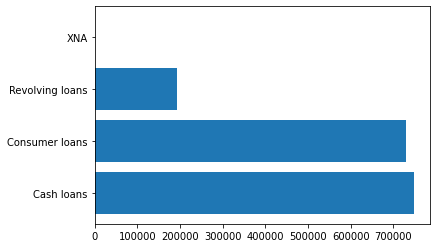

In [ ]:
#plotting bar chart for CONTRACT_TYPE categorical data
plt.barh(ct.index, ct)

In [ ]:
# Plot clearly shows that, Customer taking cash loans and customer loans are more than compared to those taking revovling loans

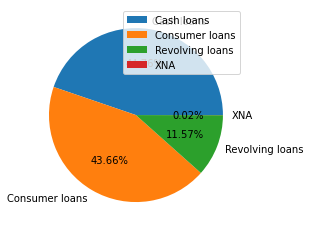

In [ ]:
#plotting pie chart for CONTRACT_TYPE categorical data
plt.pie(x=ct, labels=ct.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
#unique value CLIENT_TYPE
newtest_df.CLIENT_TYPE.unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

In [ ]:
#count of unique value CLIENT_TYPE  
clt= newtest_df.CLIENT_TYPE.value_counts()
clt

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: CLIENT_TYPE, dtype: int64

<BarContainer object of 4 artists>

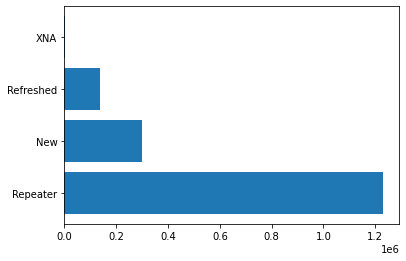

In [ ]:
#plotting bar chart for CLIENT_TYPE categorical data
plt.barh(clt.index, clt)

In [ ]:
# from the bar graph its concluded that those client who are repeaters are more as compared to new and refreshed clients

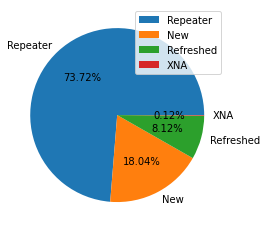

In [ ]:
##plotting pie chart for CLIENT_TYPE categorical data
plt.pie(x=clt, labels=clt.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
#unique value GOODS_CATEGORY	
newtest_df.GOODS_CATEGORY.unique()

array(['Mobile', 'XNA', 'Consumer Electronics', 'Construction Materials',
       'Auto Accessories', 'Photo / Cinema Equipment', 'Computers',
       'Audio/Video', 'Medicine', 'Clothing and Accessories', 'Furniture',
       'Sport and Leisure', 'Homewares', 'Gardening', 'Jewelry',
       'Vehicles', 'Education', 'Medical Supplies', 'Other',
       'Direct Sales', 'Office Appliances', 'Fitness', 'Tourism',
       'Insurance', 'Additional Service', 'Weapon', 'Animals',
       'House Construction'], dtype=object)

In [ ]:
#count of unique value GOODS_CATEGORY  
gt=newtest_df.GOODS_CATEGORY.value_counts()
gt

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: GOODS_CATEGORY

<BarContainer object of 28 artists>

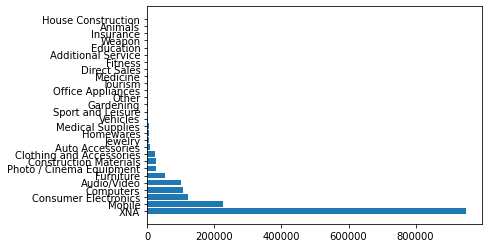

In [ ]:
#plotting bar chart for GOODS_CATEGORY categorical data
plt.barh(gt.index, gt)

In [ ]:
# People taking loan for electronics equipment are more as compared to people taking loans for house construction or insurance.

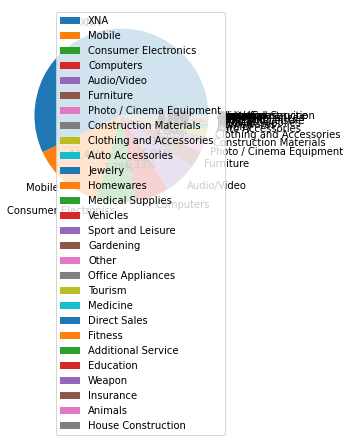

In [ ]:
#plotting pie chart for GOODS_CATEGORY categorical data
plt.pie(x=gt, labels=gt.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
#unique value PORTFOLIO	
newtest_df.PORTFOLIO.unique()

array(['POS', 'Cash', 'XNA', 'Cards', 'Cars'], dtype=object)

In [ ]:
#count of unique value PORTFOLIO  
pf=newtest_df.PORTFOLIO.value_counts()
pf

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: PORTFOLIO, dtype: int64

<BarContainer object of 5 artists>

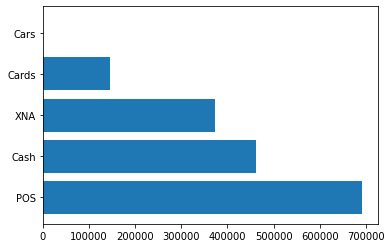

In [ ]:
#plotting bar chart for PORTFOLIO categorical data
plt.barh(pf.index, pf)

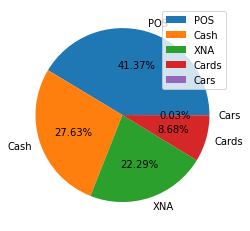

In [ ]:
#plotting pie chart for PORTFOLIO categorical data
plt.pie(x=pf, labels=pf.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
#unique value CHANNEL_TYPE	
newtest_df.CHANNEL_TYPE.unique()

array(['Country-wide', 'Contact center', 'Credit and cash offices',
       'Stone', 'Regional / Local', 'AP+ (Cash loan)',
       'Channel of corporate sales', 'Car dealer'], dtype=object)

In [ ]:
#count of unique value CHANNEL_TYPE  
cht=newtest_df.CHANNEL_TYPE.value_counts()
cht

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

<BarContainer object of 8 artists>

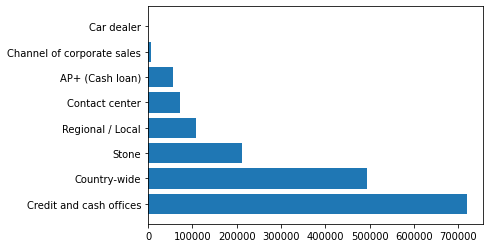

In [ ]:
#plotting bar chart for CHANNEL_TYPE categorical data
plt.barh(cht.index, cht)

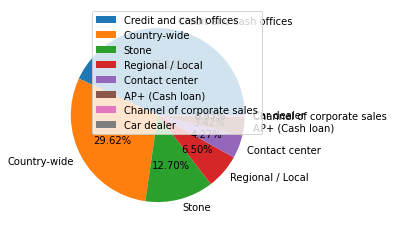

In [ ]:
#plotting pie chart for CHANNEL_TYPE categorical data
plt.pie(x=cht, labels=cht.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
#unique value SELLER_INDUSTRY	
newtest_df.SELLER_INDUSTRY.unique()

array(['Connectivity', 'XNA', 'Consumer electronics', 'Industry',
       'Clothing', 'Furniture', 'Construction', 'Jewelry',
       'Auto technology', 'MLM partners', 'Tourism'], dtype=object)

In [ ]:
#count of unique value SELLER_INDUSTRY  
si=newtest_df.SELLER_INDUSTRY.value_counts()
si

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: SELLER_INDUSTRY, dtype: int64

<BarContainer object of 11 artists>

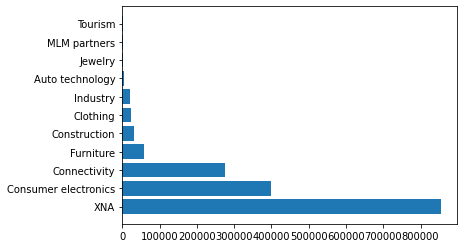

In [ ]:
#plotting bar chart for SELLER_INDUSTRY categorical data
plt.barh(si.index, si)

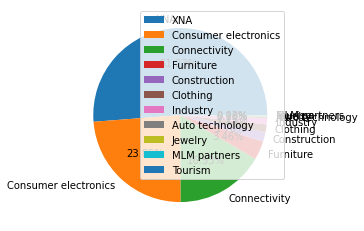

In [ ]:
#plotting pie chart for SELLER_INDUSTRY categorical data
plt.pie(x=si, labels=si.index, autopct='%1.2f%%')
plt.legend()
plt.show()

In [ ]:
#unique value YIELD_GROUP	
newtest_df.YIELD_GROUP.unique()

array(['middle', 'low_action', 'high', 'low_normal', 'XNA'], dtype=object)

In [ ]:
#count of unique value YIELD_GROUP  
yg=newtest_df.YIELD_GROUP.value_counts()
yg

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: YIELD_GROUP, dtype: int64

<BarContainer object of 5 artists>

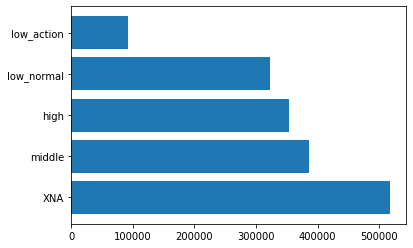

In [ ]:
#plotting bar chart for YIELD_GROUP categorical data
plt.barh(yg.index, yg)

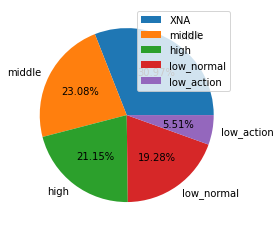

In [ ]:
#plotting pie chart for YIELD_GROUP categorical data
plt.pie(x=yg, labels=yg.index, autopct='%1.2f%%')
plt.legend()
plt.show()

--> for categorical data

In [ ]:
#checking the data types of newtest data to find out the continuous categorical data to find the correlation
newtest_df.dtypes

PREV_CustID                   int64
CURR_CustID                   int64
CONTRACT_TYPE                object
AMT_ANNUITY                 float64
AMT_APPLICATION             float64
AMT_CREDIT                  float64
AMT_DOWN_PAYMENT            float64
AMT_GOODS_PRICE             float64
LASTAPPL_PerDAY               int64
RATE_DOWN_PAYMENT           float64
RATE_INTEREST_PRIMARY       float64
RATE_INTEREST_PRIVILEGED    float64
CASH_LOAN_PURPOSE            object
CONTRACT_STATUS              object
PAYMENT_TYPE                 object
CODE_REJECT_REASON           object
CLIENT_TYPE                  object
GOODS_CATEGORY               object
PORTFOLIO                    object
CHANNEL_TYPE                 object
SELLER_INDUSTRY              object
YIELD_GROUP                  object
FIRST_DUEDay                float64
LAST_DUEDay                 float64
DAYS_TERMINATION            float64
INSURED_ON_APPROVAL         float64
dtype: object

In [ ]:
#taking only continuous data into account
cat2_df=newtest_df[['CURR_CustID','AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','FIRST_DUEDay','LAST_DUEDay','DAYS_TERMINATION','INSURED_ON_APPROVAL']]

In [ ]:
cat2_df.head()

,CURR_CustID,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FIRST_DUEDay,LAST_DUEDay,DAYS_TERMINATION,INSURED_ON_APPROVAL
0,271877,1730.430,17145.0,17145.0,17145.0,-42.0,-42.0,-37.0,0.0
1,108129,25188.615,607500.0,679671.0,607500.0,-134.0,365243.0,365243.0,1.0
2,122040,15060.735,112500.0,136444.5,112500.0,-271.0,365243.0,365243.0,1.0
3,176158,47041.335,450000.0,470790.0,450000.0,-482.0,-182.0,-177.0,1.0
4,202054,31924.395,337500.0,404055.0,337500.0,NaN,NaN,NaN,NaN


In [ ]:
#Checking Corrilation Between columns of numeric continues data
cat2_df.corr()

,CURR_CustID,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FIRST_DUEDay,LAST_DUEDay,DAYS_TERMINATION,INSURED_ON_APPROVAL
CURR_CustID,1.000000,0.000577,0.000280,0.000195,0.000369,-0.000757,-0.000318,-0.000020,0.000876
AMT_ANNUITY,0.000577,1.000000,0.808872,0.816429,0.820895,-0.053295,0.082659,0.068022,0.283080
AMT_APPLICATION,0.000280,0.808872,1.000000,0.975824,0.999884,-0.049532,0.172627,0.148618,0.259219
AMT_CREDIT,0.000195,0.816429,0.975824,1.000000,0.993087,0.002881,0.224829,0.214320,0.263932
AMT_GOODS_PRICE,0.000369,0.820895,0.999884,0.993087,1.000000,-0.021062,0.211696,0.209296,0.243400
FIRST_DUEDay,-0.000757,-0.053295,-0.049532,0.002881,-0.021062,1.000000,0.401838,0.323608,-0.119048
LAST_DUEDay,-0.000318,0.082659,0.172627,0.224829,0.211696,0.401838,1.000000,0.927990,0.012560
DAYS_TERMINATION,-0.000020,0.068022,0.148618,0.214320,0.209296,0.323608,0.927990,1.000000,-0.003065
INSURED_ON_APPROVAL,0.000876,0.283080,0.259219,0.263932,0.243400,-0.119048,0.012560,-0.003065,1.000000


In [ ]:
#dropping the columns having null vvalues and creating new dataframe
cat2_df[['CURR_CustID','AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']]

,CURR_CustID,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
0,271877,1730.430,17145.0,17145.0,17145.0
1,108129,25188.615,607500.0,679671.0,607500.0
2,122040,15060.735,112500.0,136444.5,112500.0
3,176158,47041.335,450000.0,470790.0,450000.0
4,202054,31924.395,337500.0,404055.0,337500.0
...,...,...,...,...,...
1670209,352015,14704.290,267295.5,311400.0,267295.5
1670210,334635,6622.020,87750.0,64291.5,87750.0
1670211,249544,11520.855,105237.0,102523.5,105237.0
1670212,400317,18821.520,180000.0,191880.0,180000.0


In [ ]:
cat3_df=cat2_df[['CURR_CustID','AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']].corr()
cat3_df

,CURR_CustID,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
CURR_CustID,1.000000,0.000577,0.000280,0.000195,0.000369
AMT_ANNUITY,0.000577,1.000000,0.808872,0.816429,0.820895
AMT_APPLICATION,0.000280,0.808872,1.000000,0.975824,0.999884
AMT_CREDIT,0.000195,0.816429,0.975824,1.000000,0.993087
AMT_GOODS_PRICE,0.000369,0.820895,0.999884,0.993087,1.000000


Conclusion--> 
1. AMT_ANNUITY is strongly correlated with
*   AMT_APPLICATION by corelation coefficient 0.808872	
*   AMT_CREDIT by corelation coefficient 0.816429
*   AMT_GOODS_PRICE by corelation coefficient 0.820895


2. AMT_APPLICATION is strongly correlated with	
*   AMT_CREDIT by corelation coefficient 0.975824
*   AMT_GOODS_PRICE by corelation coefficient 0.999884


3. AMT_CREDIT is strongly correlated with
*   AMT_GOODS_PRICE by corelation coefficient 0.993087


#ploting pairplot for continues data to check the retaion between columns

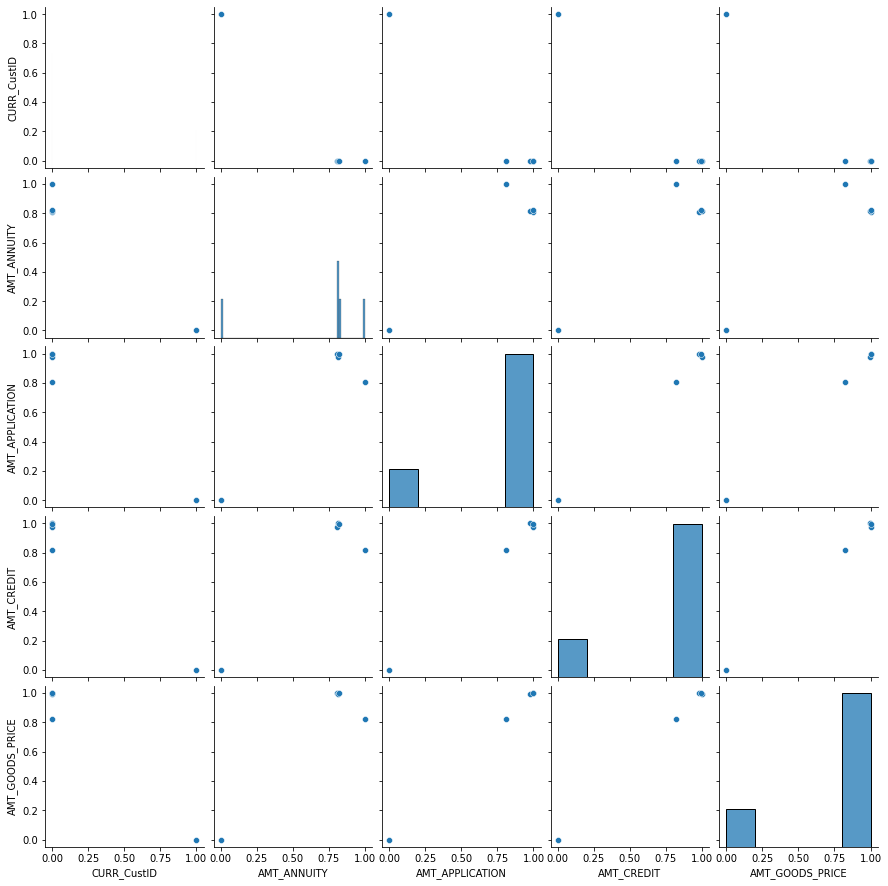

In [ ]:
#creating pairplot graph
sns.pairplot(data=cat3_df)


# Handling Outliers

In [ ]:
# AMT_APPLICATION

In [ ]:
#Checking outliers for INCOME
cat3_df.AMT_APPLICATION.describe()

count    5.000000
mean     0.756972
std      0.430477
min      0.000280
25%      0.808872
50%      0.975824
75%      0.999884
max      1.000000
Name: AMT_APPLICATION, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


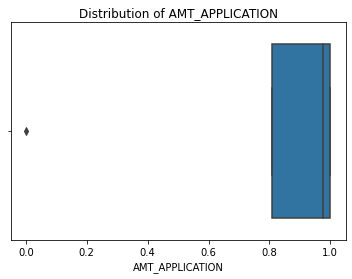

In [ ]:
sns.boxplot(cat3_df.AMT_APPLICATION)
plt.title('Distribution of AMT_APPLICATION')
plt.show()

In [ ]:
# AMT_CREDIT

In [ ]:
#Checking outliers for AMT_CREDIT
cat3_df.AMT_CREDIT.describe()

count    5.000000
mean     0.757107
std      0.429813
min      0.000195
25%      0.816429
50%      0.975824
75%      0.993087
max      1.000000
Name: AMT_CREDIT, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


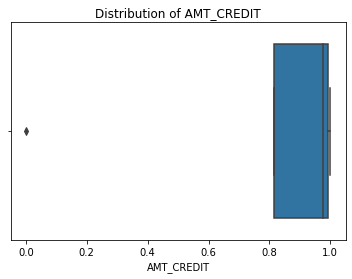

In [ ]:
sns.boxplot(cat3_df.AMT_CREDIT)
plt.title('Distribution of AMT_CREDIT')
plt.show()

In [ ]:
# AMT_GOODS_PRICE

In [ ]:
#Checking outliers for AMT_GOODS_PRICE
cat3_df.AMT_GOODS_PRICE.describe()

count    5.000000
mean     0.762847
std      0.433065
min      0.000369
25%      0.820895
50%      0.993087
75%      0.999884
max      1.000000
Name: AMT_GOODS_PRICE, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


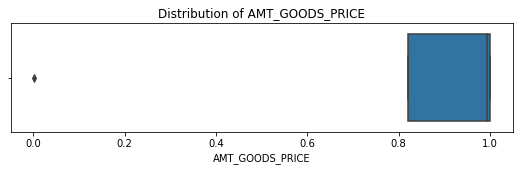

In [ ]:
plt.figure(figsize=(9,2))
sns.boxplot(cat3_df.AMT_GOODS_PRICE)
plt.title('Distribution of AMT_GOODS_PRICE')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

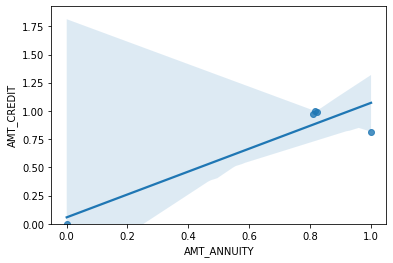

In [ ]:
sns.regplot(x="AMT_ANNUITY", y="AMT_CREDIT", data=cat3_df)
plt.ylim(0,)
plt.show()

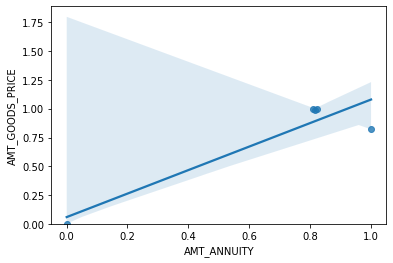

In [ ]:
sns.regplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE", data=cat3_df)
plt.ylim(0,)
plt.show()

Q. Filterring data on bases of Loan amount for top 10 loan amounts

In [ ]:
df_amt=cat2_df.nlargest(10,columns='AMT_APPLICATION')
df_amt.head()

,CURR_CustID,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FIRST_DUEDay,LAST_DUEDay,DAYS_TERMINATION,INSURED_ON_APPROVAL
779304,412009,NaN,6905160.0,6905160.0,6905160.0,NaN,NaN,NaN,NaN
1058067,346243,103498.650,5850000.0,4095000.0,5850000.0,NaN,NaN,NaN,NaN
1163698,346243,113979.690,5850000.0,4509688.5,5850000.0,-2443.0,-1513.0,-1505.0,1.0
1348406,324681,83707.830,5085000.0,3051000.0,5085000.0,-2598.0,-2598.0,-2591.0,0.0
1245539,173326,119443.005,4455000.0,4009500.0,4455000.0,NaN,NaN,NaN,NaN


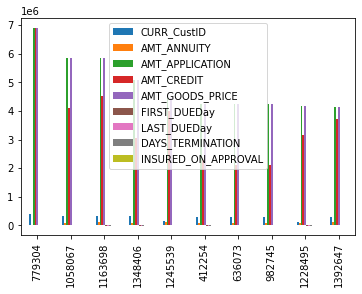

In [ ]:
#Plotting graph for approved loan amount 
df_amt.plot.bar()